In [1]:
from zipfile import ZipFile
import os

# Unzip the Netflix dataset and rename the CSV file
with ZipFile('netflix_data.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extracts file in the zip 
os.rename('netflix_data.csv', 'Netflix_shows_movies.csv')  # Rename file


In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('Netflix_shows_movies.csv')

# Drop rows with missing rating (ensuring all entries have a rating)
df.dropna(subset=['rating'], inplace=True)  # Drops rows where 'rating' is NaN

# Optionally fill other missing values (e.g., missing country names)
df['country'] = df['country'].fillna('Unknown')


In [4]:
# Dataframe summary
df.info()                 # Prints concise summary (non-null counts, dtypes)
print(df.describe())      # Descriptive stats for numeric fields

# Categorical counts
print(df['type'].value_counts())    # Count of Movies vs TV Shows
print(df['rating'].value_counts())  # Frequency of each rating category

<class 'pandas.core.frame.DataFrame'>
Index: 6224 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6224 non-null   int64 
 1   type          6224 non-null   object
 2   title         6224 non-null   object
 3   director      4259 non-null   object
 4   cast          5657 non-null   object
 5   country       6224 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6224 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6224 non-null   object
 10  listed_in     6224 non-null   object
 11  description   6224 non-null   object
dtypes: int64(2), object(10)
memory usage: 632.1+ KB
            show_id  release_year
count  6.224000e+03   6224.000000
mean   7.669981e+07   2013.357005
std    1.095067e+07      8.818165
min    2.477470e+05   1925.000000
25%    8.003568e+07   2013.000000
50%    8.016342e+07   2016.000000
75%    8.024498e+07

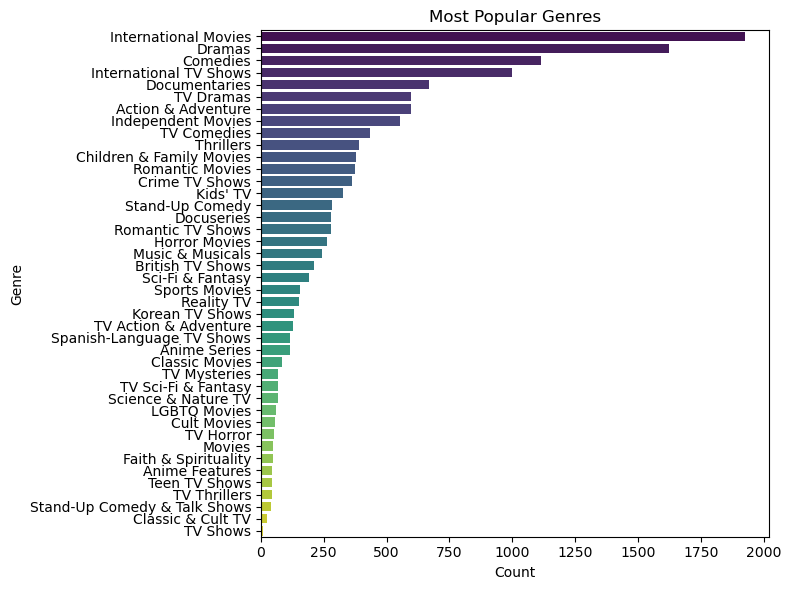

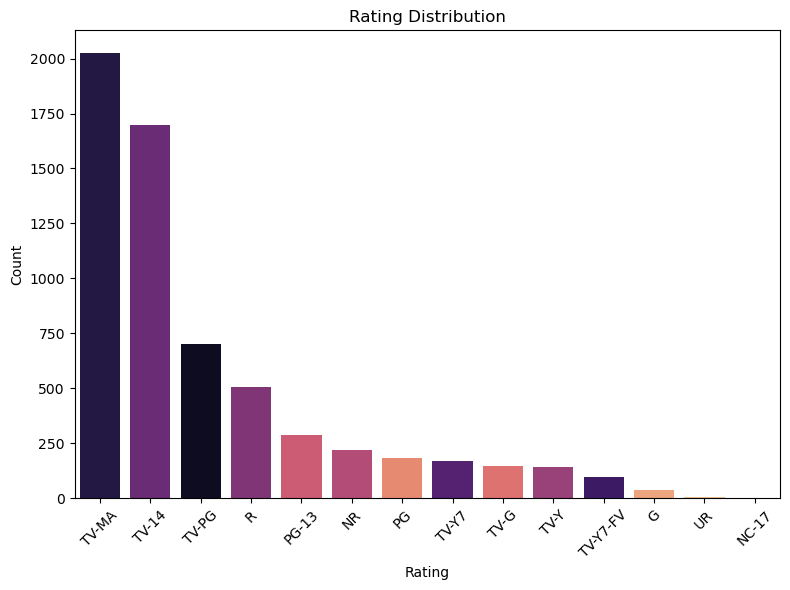

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare genre data: split multiple genres and count
genres = df['listed_in'].str.split(', ')
genres = genres.explode()
genre_counts = genres.value_counts()

# Bar chart: Most Popular Genres
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('genre_counts.png')
plt.show()

# Bar chart: Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df,
              order=df['rating'].value_counts().index,
              hue='rating',
              palette='magma',
              legend=False)
plt.xticks(rotation=45)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()